Dataset Overview

1. team: Indicates the batting team.
2. over: Over number in the match.
3. batter: The batsman facing the delivery.
4. bowler: The bowler delivering the ball.
5. non_striker: The batsman at the non-striker’s end.
6. runs_batter: Runs scored by the batter off the delivery.
7. runs_extras: Extra runs (like wides, no balls) were conceded during the delivery.
8. runs_total: Total runs scored from the delivery.
9. player_out: Name of the player out on the delivery (if any).
10. wicket_kind: Type of dismissal (if any).
11. fielders: Names of fielders involved in the dismissal (if any).

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use("ggplot")
sns.set_style("whitegrid")
import warnings as w
w.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\innings_deliveries.csv")

In [3]:
df.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]


In [4]:
df.shape

(247, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team         247 non-null    object
 1   over         247 non-null    int64 
 2   batter       247 non-null    object
 3   bowler       247 non-null    object
 4   non_striker  247 non-null    object
 5   runs_batter  247 non-null    int64 
 6   runs_extras  247 non-null    int64 
 7   runs_total   247 non-null    int64 
 8   player_out   19 non-null     object
 9   wicket_kind  19 non-null     object
 10  fielders     247 non-null    object
dtypes: int64(4), object(7)
memory usage: 21.4+ KB


In [6]:
df.isnull().sum()

team             0
over             0
batter           0
bowler           0
non_striker      0
runs_batter      0
runs_extras      0
runs_total       0
player_out     228
wicket_kind    228
fielders         0
dtype: int64

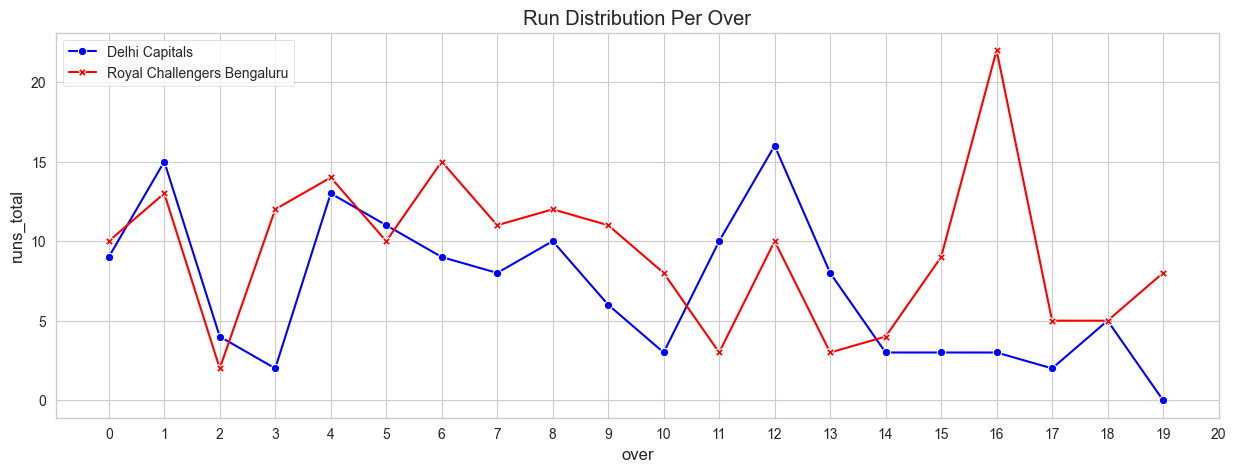

In [78]:
# data preparation for run distribution per over
rpo = df.groupby(["team", "over"])["runs_total"].sum().reset_index()

plt.figure( figsize = (15,5))

sns.lineplot(data = rpo[rpo["team"] == "Delhi Capitals"] , x = "over" ,y = "runs_total", label = "Delhi Capitals", color = "blue", marker = "o")
sns.lineplot(data = rpo[rpo["team"] == "Royal Challengers Bengaluru"] , x = "over" ,y = "runs_total", label = "Royal Challengers Bengaluru", color = "red", marker = "X")

plt.title('Run Distribution Per Over')
plt.xticks(range(0,21))
plt.legend()
plt.show()

## The plot above shows the run distribution per over for both teams. Here are some insights:

#### The scoring rate for each team shows fluctuations throughout their innings, with spikes indicating overs with high scoring, likely due to boundaries or big hits.

#### Royal Challengers Bangalore (RCB) appears to have a couple of overs with significantly higher runs, suggesting aggressive batting.

#### Next, I’ll analyze the top scorers from each team to highlight individual performances. Let’s create a bar chart to visualize the top contributors in terms of runs:

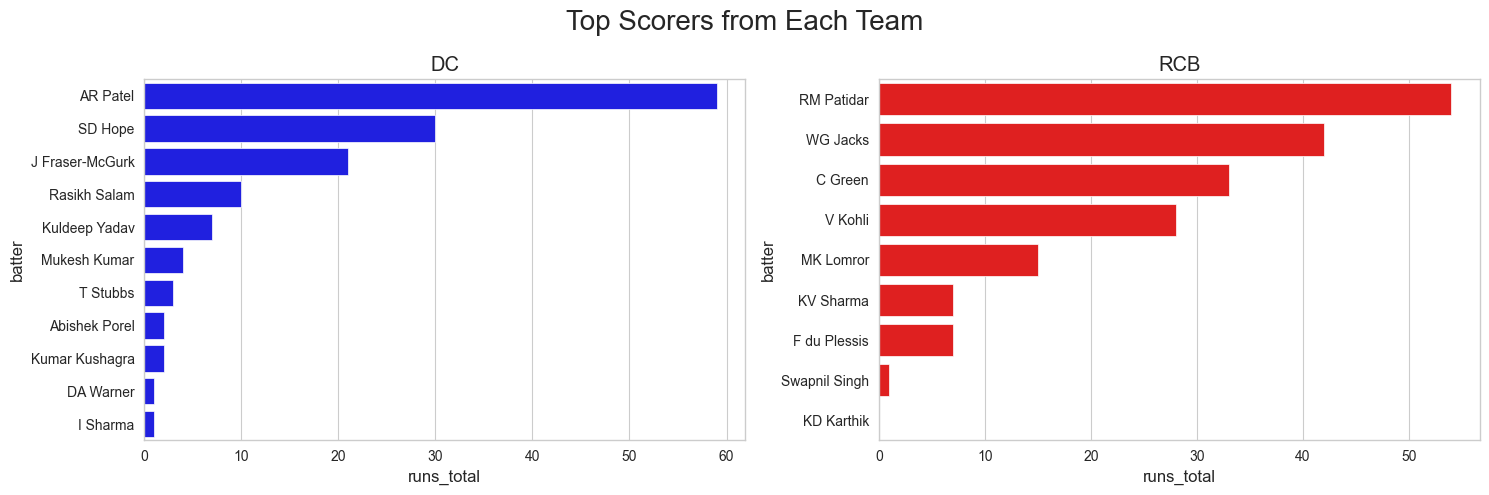

In [79]:
# calculating top scorers for each team
ts = df.groupby(["team", "batter"])["runs_total"].sum().reset_index().sort_values(by = "runs_total", ascending = False)

fig , ax = plt.subplots(1,2, figsize = (15,5))

sns.barplot( data = ts[ts["team"] == "Delhi Capitals"] , x = "runs_total", y = "batter", color = "blue", ax = ax[0])
ax[0].set_title("DC")

sns.barplot( data = ts[ts["team"] == "Royal Challengers Bengaluru"] , x = "runs_total", y = "batter", color = "red", ax = ax[1])
ax[1].set_title("RCB")

plt.suptitle('Top Scorers from Each Team', size = 20)
plt.tight_layout()
plt.show()

### Key observations from the graph include:


- **AR Patel** from Delhi Capitals is the top scorer of the match, significantly outscoring others with a little over 50 runs.
- **RM Patidar** is the top scorer for Royal Challengers Bangalore, closely approaching 50 runs.

#### The graph displays a diverse contribution from both teams, with several players from both sides contributing notable scores.

In [9]:
# preparing data for bowling analysis
df["wicket_taken"] = df["wicket_kind"].notna().astype(int)

bowl_stats = df.groupby(["team", "bowler"]).agg({"runs_total":"sum", "over":"nunique", "wicket_taken":"sum"}).reset_index()

# calculating economy rate (total runs conceded / number of overs bowled)
bowl_stats["economy_rate"] = bowl_stats["runs_total"] / bowl_stats["over"]

bowl_stats

,team,bowler,runs_total,over,wicket_taken,economy_rate
0,Delhi Capitals,C Green,19,4,2,4.750000
1,Delhi Capitals,KV Sharma,19,2,0,9.500000
2,Delhi Capitals,LH Ferguson,24,4,2,6.000000
3,Delhi Capitals,Mohammed Siraj,33,4,1,8.250000
4,Delhi Capitals,Swapnil Singh,9,1,1,9.000000
5,Delhi Capitals,WG Jacks,16,1,0,16.000000
6,Delhi Capitals,Yash Dayal,20,4,4,5.000000
7,Royal Challengers Bengaluru,AR Patel,24,3,0,8.000000
8,Royal Challengers Bengaluru,I Sharma,31,3,1,10.333333
9,Royal Challengers Bengaluru,KK Ahmed,32,4,2,8.000000


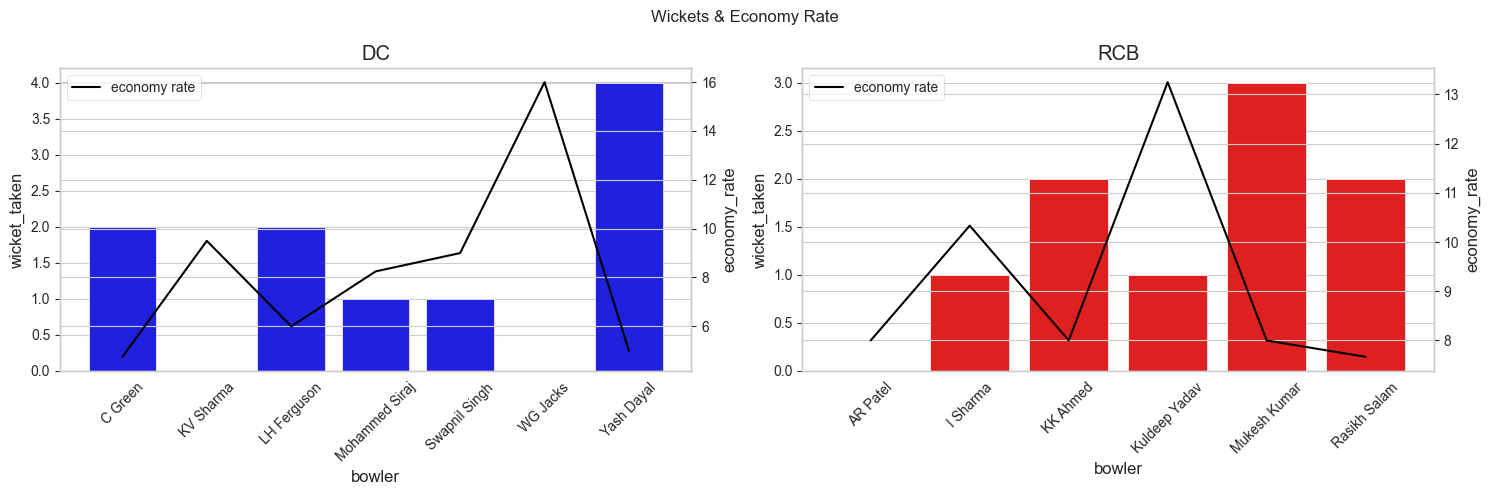

In [10]:
fig, ax1 = plt.subplots(1, 2, figsize=(15, 5))

# Plotting for Delhi Capitals
sns.barplot(data=bowl_stats[bowl_stats["team"] == "Delhi Capitals"], x="bowler", y="wicket_taken", color="blue", ax=ax1[0])
ax1[0].set_title("DC")
ax1[0].set_xticks(range(len(bowl_stats[bowl_stats["team"] == "Delhi Capitals"]["bowler"])))
ax1[0].set_xticklabels(bowl_stats[bowl_stats["team"] == "Delhi Capitals"]["bowler"], rotation=45)

ax2 = ax1[0].twinx()
sns.lineplot(data=bowl_stats[bowl_stats["team"] == "Delhi Capitals"], x="bowler", y="economy_rate", color="black", ax=ax2, label="economy rate")

# Plotting for Royal Challengers Bengaluru
sns.barplot(data=bowl_stats[bowl_stats["team"] == "Royal Challengers Bengaluru"], x="bowler", y="wicket_taken", color="red", ax=ax1[1])
ax1[1].set_title("RCB")
ax1[1].set_xticks(range(len(bowl_stats[bowl_stats["team"] == "Royal Challengers Bengaluru"]["bowler"])))
ax1[1].set_xticklabels(bowl_stats[bowl_stats["team"] == "Royal Challengers Bengaluru"]["bowler"], rotation=45)

ax3 = ax1[1].twinx()
sns.lineplot(data=bowl_stats[bowl_stats["team"] == "Royal Challengers Bengaluru"], x="bowler", y="economy_rate", color="black", ax=ax3, label="economy rate")
ax3.legend(loc = "upper left")

plt.suptitle("Wickets & Economy Rate")
plt.tight_layout()
plt.show()


- **Wickets Taken:** The bars indicate the number of wickets each bowler took during the match. 
The height of the bars reflects how successful the bowlers were in terms of taking wickets. 
Bowlers from both teams contributed to taking wickets, with some notable performances that stand out due to higher bars.

- **Economy Rate:** The line graph overlaid on the bar graph shows the economy rate (number of runs conceded per over) of each bowler. 
The economy rate is crucial as it indicates how economically a bowler has bowled in terms of runs given away.

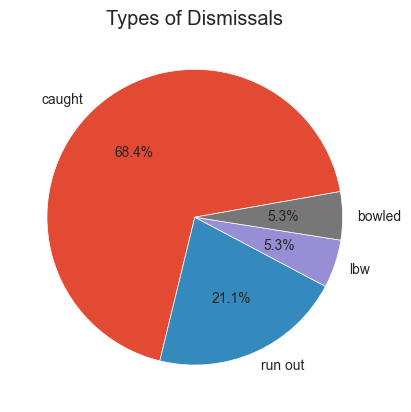

In [11]:
plt.pie(x = df["wicket_kind"].value_counts(), labels = df["wicket_kind"].value_counts().keys() , 
        autopct = "%1.1f%%", startangle = 10)

plt.title('Types of Dismissals')
plt.show()

In [12]:
# function to classify the phase of the game based on the over number
def phase(over):
    if over < 6:
        return "Power Play"
    elif over < 16:
        return "Middle"
    else:
        return "Death"

In [13]:
# adding phase information to the dataframe
df["phase"] = df["over"].apply(phase)

In [14]:
# grouping data by phase and team to calculate runs and wickets
pr = df.groupby(["team", "phase"])["runs_total"].sum().reset_index()
pr

,team,phase,runs_total
0,Delhi Capitals,Death,10
1,Delhi Capitals,Middle,76
2,Delhi Capitals,Power Play,54
3,Royal Challengers Bengaluru,Death,40
4,Royal Challengers Bengaluru,Middle,86
5,Royal Challengers Bengaluru,Power Play,61


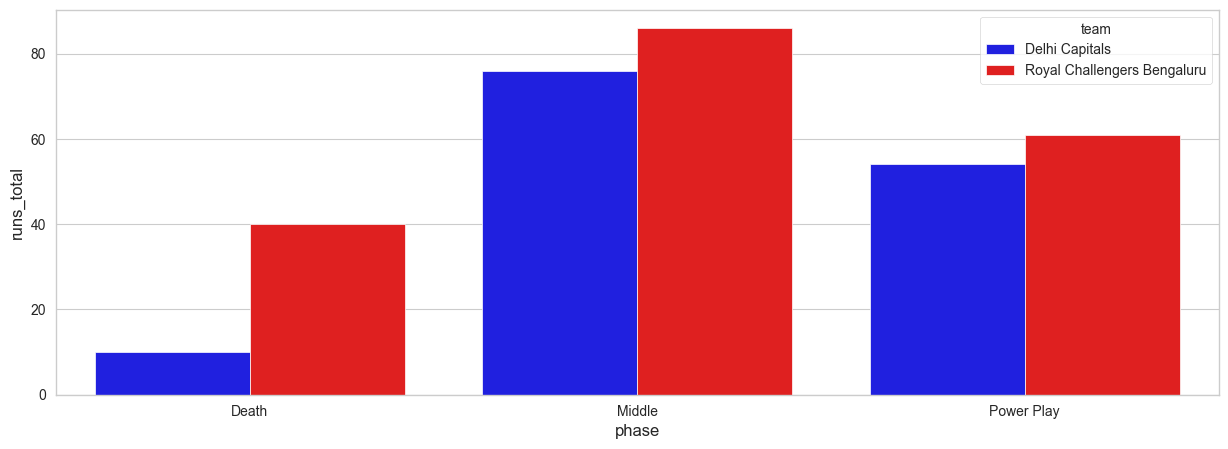

In [15]:
plt.figure( figsize = (15,5))

sns.barplot( data = pr , x = "phase", y = "runs_total", hue = "team", palette = ["blue","red"])

plt.show()

In [16]:
phase = df.groupby(['team', 'phase']).agg({'runs_total': 'sum', 'wicket_taken': 'sum', 'over': 'count'}).rename(columns={'over': 'balls'}).reset_index()

In [17]:
# calculating the run rate
phase['run_rate'] = (phase['runs_total'] / phase['balls']) * 6
phase

,team,phase,runs_total,wicket_taken,balls,run_rate
0,Delhi Capitals,Death,10,2,22,2.727273
1,Delhi Capitals,Middle,76,4,62,7.354839
2,Delhi Capitals,Power Play,54,4,36,9.000000
3,Royal Challengers Bengaluru,Death,40,5,25,9.600000
4,Royal Challengers Bengaluru,Middle,86,2,65,7.938462
5,Royal Challengers Bengaluru,Power Play,61,2,37,9.891892


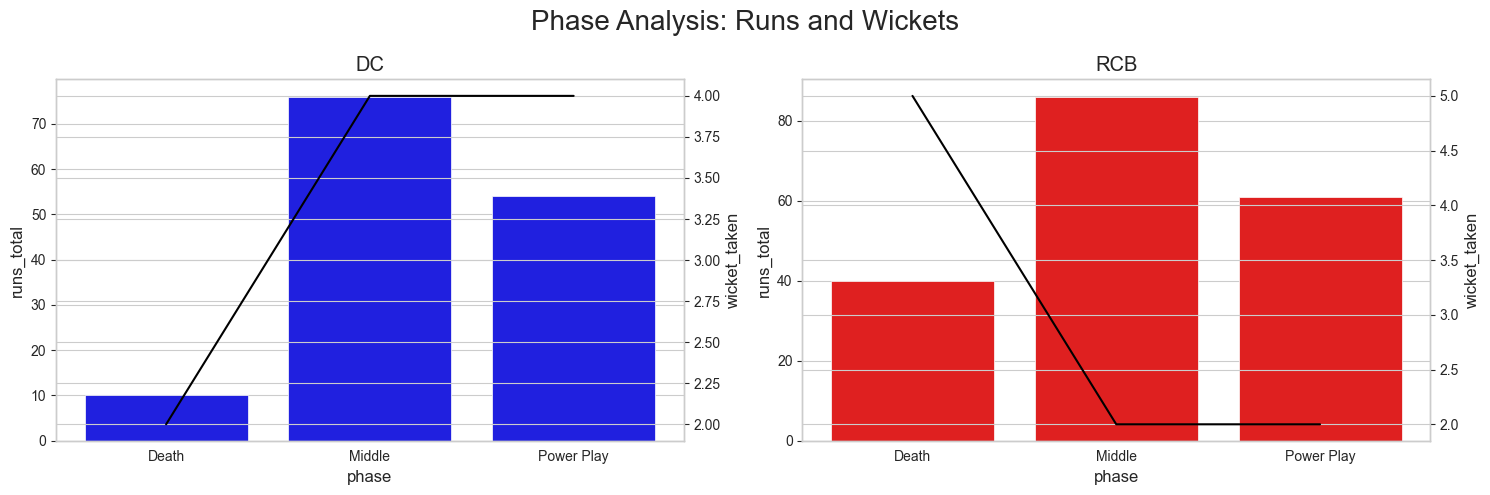

In [18]:
fig , ax = plt.subplots(1,2, figsize = (15,5))

sns.barplot(data = phase[phase["team"]=="Delhi Capitals"], x = "phase", y = "runs_total", ax = ax[0], color = "blue")
ax[0].set_title("DC")

ax1 = ax[0].twinx()

sns.lineplot( data = phase[phase["team"]=="Delhi Capitals"], x = "phase", y = "wicket_taken", color = "k", ax = ax1 )

sns.barplot(data = phase[phase["team"]=="Royal Challengers Bengaluru"], x = "phase", y = "runs_total", ax = ax[1], color = "red")
ax[1].set_title("RCB")

ax1 = ax[1].twinx()

sns.lineplot( data = phase[phase["team"]=="Royal Challengers Bengaluru"], x = "phase", y = "wicket_taken", color = "k", ax = ax1 )

plt.suptitle('Phase Analysis: Runs and Wickets', size = 20)
plt.tight_layout()
plt.show()

- **Powerplay:** Both teams have a relatively low total of runs, with RCB losing more wickets than DC in this phase, 
as indicated by the height of the orange line.
    
- **Middle:** This phase shows the highest run-scoring for both teams, with DC scoring slightly more than RCB. 
The wickets lost remain controlled, suggesting stable innings from both teams.

- **Death:** RCB has a sharp decrease in runs compared to the Middle phase, while DC maintains a high run rate. 
Wickets lost by RCB increased significantly in this phase, marked by the orange line peaking near 4.5, 
indicating a possible collapse or aggressive batting that did not pay off.

In [83]:
batter_stats = df.groupby(["team","batter","phase"]).agg({"runs_batter":"sum", "over":"count"}).rename(columns = {"over":"ball_faced"}).reset_index()
batter_stats

,team,batter,phase,runs_batter,ball_faced
0,Delhi Capitals,AR Patel,Middle,47,32
1,Delhi Capitals,AR Patel,Power Play,10,8
2,Delhi Capitals,Abishek Porel,Power Play,2,3
3,Delhi Capitals,DA Warner,Power Play,1,2
4,Delhi Capitals,I Sharma,Death,0,5
5,Delhi Capitals,J Fraser-McGurk,Power Play,21,8
6,Delhi Capitals,Kuldeep Yadav,Death,5,10
7,Delhi Capitals,Kuldeep Yadav,Middle,1,1
8,Delhi Capitals,Kumar Kushagra,Power Play,2,3
9,Delhi Capitals,Mukesh Kumar,Death,2,7


In [85]:
batter_stats["strike_rate"] = batter_stats["runs_batter"] / batter_stats["ball_faced"] * 100
batter_stats

,team,batter,phase,runs_batter,ball_faced,strike_rate
0,Delhi Capitals,AR Patel,Middle,47,32,146.875000
1,Delhi Capitals,AR Patel,Power Play,10,8,125.000000
2,Delhi Capitals,Abishek Porel,Power Play,2,3,66.666667
3,Delhi Capitals,DA Warner,Power Play,1,2,50.000000
4,Delhi Capitals,I Sharma,Death,0,5,0.000000
5,Delhi Capitals,J Fraser-McGurk,Power Play,21,8,262.500000
6,Delhi Capitals,Kuldeep Yadav,Death,5,10,50.000000
7,Delhi Capitals,Kuldeep Yadav,Middle,1,1,100.000000
8,Delhi Capitals,Kumar Kushagra,Power Play,2,3,66.666667
9,Delhi Capitals,Mukesh Kumar,Death,2,7,28.571429


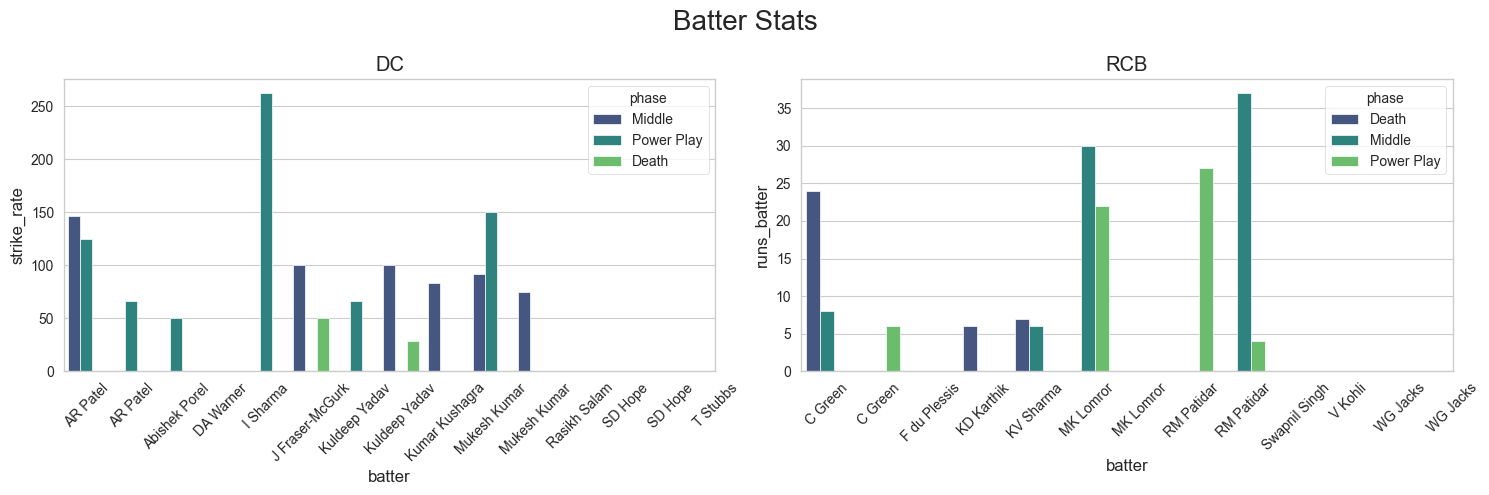

In [100]:
fig , ax = plt.subplots(1,2, figsize = (15,5))

sns.barplot( data = batter_stats[batter_stats["team"] == "Delhi Capitals"], x = "batter", y = "strike_rate", hue = "phase", ax = ax[0], palette = "viridis")
ax[0].set_xticks(range(len(batter_stats[batter_stats["team"] == "Delhi Capitals"])))
ax[0].set_xticklabels(batter_stats[batter_stats["team"] == "Delhi Capitals"]["batter"] , rotation = 45)
ax[0].set_title("DC")

sns.barplot( data = batter_stats[batter_stats["team"] == "Royal Challengers Bengaluru"], x = "batter", y = "runs_batter", hue = "phase", ax = ax[1], palette = "viridis")
ax[1].set_xticks(range(len(batter_stats[batter_stats["team"] == "Royal Challengers Bengaluru"])))
ax[1].set_xticklabels(batter_stats[batter_stats["team"] == "Royal Challengers Bengaluru"]["batter"] , rotation = 45)
ax[1].set_title("RCB")

plt.suptitle("Batter Stats", size = 20)
plt.tight_layout()
plt.show()

In [24]:
# calculate cumulative runs and wickets for each ball for both teams
df["cum_runs"] = df.groupby("team")["runs_batter"].cumsum()
df["cum_wickets"] = df.groupby("team")["over"].cumsum()

In [25]:
# separate data for both teams
rcb_del = df[ df["team"] == "Royal Challengers Bengaluru"]
dc_del = df[ df["team"] == "Delhi Capitals"]

In [26]:
# calculating overs for cumulative analysis
rcb_del["over_ball"] = rcb_del["over"] + (rcb_del.groupby('over').cumcount() + 1) / 6
dc_del["over_ball"] = dc_del["over"] + (dc_del.groupby('over').cumcount() + 1) / 6

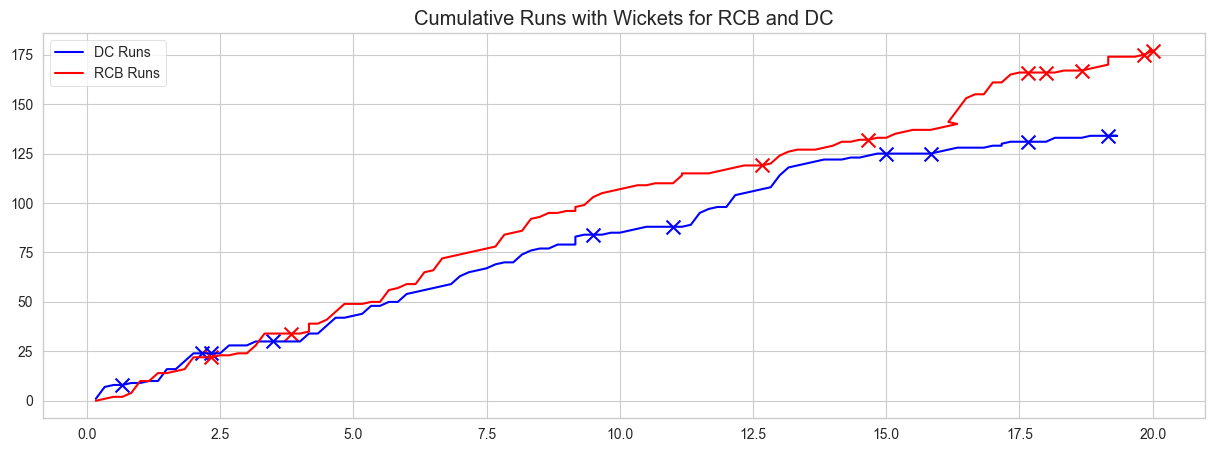

In [73]:
fig , ax = plt.subplots(figsize = (15,5))

ax.plot(dc_del["over_ball"] , dc_del["cum_runs"], color = "blue", label = "DC Runs")
ax.scatter(x = dc_del[dc_del["wicket_taken"] == 1]["over_ball"], y = dc_del[dc_del["wicket_taken"] == 1]["cum_runs"], marker = "x", s = 100, color = "blue")

ax.plot(rcb_del["over_ball"], rcb_del["cum_runs"], color = "red", label = "RCB Runs")
ax.scatter(rcb_del[rcb_del["wicket_taken"] == 1]["over_ball"], y = rcb_del[rcb_del["wicket_taken"] == 1]["cum_runs"], marker = "x", s = 100, color = "red")

ax.set_title('Cumulative Runs with Wickets for RCB and DC')
ax.legend()
plt.show()

- **Momentum Shifts:** The points where wickets are lost are crucial. Despite wickets, RCB’s run line does not show any drastic downturns, 
suggesting effective recovery by subsequent batters.

- **Performance Analysis:** RCB’s ability to keep the run rate up despite losing wickets might indicate deeper batting strength or 
successful innings pacing strategies. In contrast, DC, while also increasing their score, does so at a less steep rate, 
possibly indicating fewer big overs.

In [34]:
per_over_stats = df.groupby(["team","over"]).agg({'runs_total': 'sum', 'wicket_taken': 'sum'}).reset_index()
per_over_stats.head()

,team,over,runs_total,wicket_taken
0,Delhi Capitals,0,9,1
1,Delhi Capitals,1,15,0
2,Delhi Capitals,2,4,2
3,Delhi Capitals,3,2,1
4,Delhi Capitals,4,13,0


In [35]:
# calculate run rate for each over
per_over_stats['run_rate'] = (per_over_stats['runs_total'] / 6)    # Runs per over to runs per ball (standard rate)
per_over_stats.head()

,team,over,runs_total,wicket_taken,run_rate
0,Delhi Capitals,0,9,1,1.500000
1,Delhi Capitals,1,15,0,2.500000
2,Delhi Capitals,2,4,2,0.666667
3,Delhi Capitals,3,2,1,0.333333
4,Delhi Capitals,4,13,0,2.166667


In [36]:
# separate data for RCB and DC for plotting
rcb_per_over_stats = per_over_stats[per_over_stats['team'] == 'Royal Challengers Bengaluru']
dc_per_over_stats = per_over_stats[per_over_stats['team'] == 'Delhi Capitals']

In [70]:
rcb_per_over_stats.head()

,team,over,runs_total,wicket_taken,run_rate
20,Royal Challengers Bengaluru,0,10,0,1.666667
21,Royal Challengers Bengaluru,1,13,0,2.166667
22,Royal Challengers Bengaluru,2,2,1,0.333333
23,Royal Challengers Bengaluru,3,12,1,2.000000
24,Royal Challengers Bengaluru,4,14,0,2.333333


In [72]:
dc_per_over_stats.head()

,team,over,runs_total,wicket_taken,run_rate
0,Delhi Capitals,0,9,1,1.500000
1,Delhi Capitals,1,15,0,2.500000
2,Delhi Capitals,2,4,2,0.666667
3,Delhi Capitals,3,2,1,0.333333
4,Delhi Capitals,4,13,0,2.166667


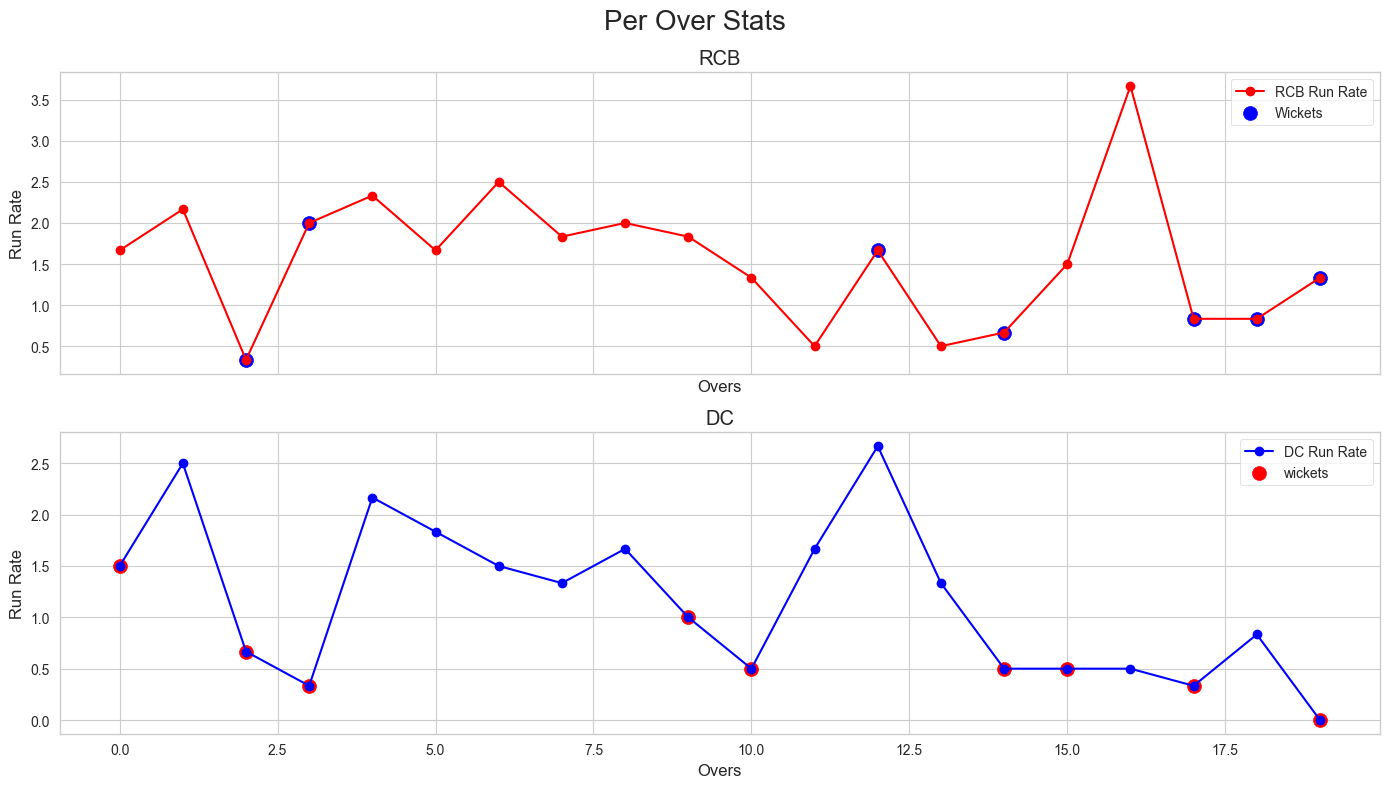

In [81]:
# plotting run rates and marking wickets for each team
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex = True)

# RCB
ax1.plot(rcb_per_over_stats['over'], rcb_per_over_stats['run_rate'], marker='o', color='red', label='RCB Run Rate')
ax1.scatter(rcb_per_over_stats[rcb_per_over_stats['wicket_taken'] > 0]['over'], rcb_per_over_stats[rcb_per_over_stats['wicket_taken'] > 0]['run_rate'], color = "blue", marker = "o", s = 100, label = "Wickets")
ax1.set_title("RCB")
ax1.set_xlabel("Overs")
ax1.set_ylabel("Run Rate")
ax1.legend()

ax2.plot(dc_per_over_stats['over'], dc_per_over_stats["run_rate"], marker = 'o', color = "blue", label = 'DC Run Rate')
ax2.scatter(dc_per_over_stats[dc_per_over_stats['wicket_taken']>0]['over'], dc_per_over_stats[dc_per_over_stats['wicket_taken']>0]['run_rate'], color ="red", s = 100, marker = "o", label = "wickets")
ax2.set_title("DC")
ax2.set_xlabel("Overs")
ax2.set_ylabel("Run Rate")
ax2.legend()

plt.suptitle("Per Over Stats", size = 20)
plt.tight_layout()
plt.show()

- **RCB Run Rate Fluctuations:** RCB’s run rate shows significant fluctuations, peaking at around 3.5 runs per ball towards the end of the innings. 
The presence of wicket markers (red circles) indicates that wickets were taken during overs where the run rate was generally lower, 
which is typical as wickets tend to disrupt batting flow.
   
- **DC Run Rate Patterns:** DC’s run rate starts strong but sees a sharp decline after the initial overs, stabilizing somewhat in 
the middle before another peak and subsequent fall towards the end. Wickets (blue circles) are taken in overs where the run rate drops, 
suggesting effective bowling from RCB during these times.

## Summary

The match between RCB and DC showcased a blend of strategic batting, aggressive bowling, and critical partnerships. 
RCB’s ability to maintain a higher cumulative run rate and effective wicket-taking in crucial overs contributed significantly to their victory. 
The detailed phase-wise and player-specific analysis not only highlights 
the dynamics of T20 cricket but also assists in understanding how momentum shifts and strategic decisions impact the game’s outcome.